02 Visualize reality check
===
Line chart one country all waves ~4 questions Female/Male + reality 

Note: the usp is, multiple questions at once (unlike violine) and good time-series representation (unlike radar) and reality added (unlike both former)

(Optional:
    coulor map when is which sex the better/worse predictor  (siehe anteil grün produzierter Strom am Verbrauch)
    lr forcast future/missing values
    lr to evaluate most predictive questions for reality/country/sex
)

In [1]:
#library
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#load data
dfWVS = pd.read_csv('..//data//WVS_cleaned_10.csv')
HDR = pd.read_csv('..//data//HDR.csv')

#define variables
list6Countries=['Germany','China','Turkey','Nigeria','Peru']
list10Countries =['Germany','China','Nigeria','Iran','United States','South Africa']
listGenderQuestions=['job', 'politician', 'university']
listDemographicQuestions=['sex', 'age', 'ethnic', 'status']
listIDColummns=['wave', 'wave_years', 'country', 'respondent_number', 'year']
listCountries = list10Countries
listWaves = ['WVS3','WVS4','WVS5','WVS6','WVS7']
listYears = ['1994-1998','1999-2004','2005-2009','2010-2014','2017-2022']

1. Plot answers to job, uni, politician question per country over time 
2. Add Gender
3. Add ErrorBars
4. Add GII (2nd y axis!)
5. optional: adjust step size of GII
6. optional: subdata from GII (avr years edu, %parliament, %jobs)

Data preprocessing for plots part 1: dfWVS

In [70]:
listWaves = ['WVS3', 'WVS4', 'WVS5', 'WVS6', 'WVS7']
gender = ['Male', 'Female']
questions = ['university', 'politician', 'job']


def generate_table_per_country(data, country):
    data_country = []

    for wave in listWaves:
        one_wave = data[(data['wave'] == wave) & (data['country'] == country)]

        for sex in gender:
            one_gender = one_wave[one_wave['sex'] == sex]

            wave_data = {
                'Wave': wave,
                'Year':one_gender['year'].max(),
                'Sex': sex,
                'Job': one_gender['job'].mean() / one_gender['job'].max(),
                'University': one_gender['university'].mean() / one_gender['university'].max(),
                'Politician': one_gender['politician'].mean() / one_gender['politician'].max()
            }

            data_country.append(wave_data)

    # Convert the list of dicts to a DataFrame
    df = pd.DataFrame(data_country)

    return df

countries =['Germany','China','Iran','South Africa']

# Example usage for Germany
germany_table = generate_table_per_country(dfWVS, 'Germany')
print(germany_table)
china_table = generate_table_per_country(dfWVS, 'China')
nigeria_table = generate_table_per_country(dfWVS, 'Nigeria')
usa_table = generate_table_per_country(dfWVS, 'United States')
turkey_table = generate_table_per_country(dfWVS, 'Turkey')
iran_table = generate_table_per_country(dfWVS, 'Iran')
serbia_table = generate_table_per_country(dfWVS, 'Serbia')
southafrica_table = generate_table_per_country(dfWVS, 'South Africa')

   Wave    Year     Sex       Job  University  Politician
0  WVS3  1997.0    Male  0.793360    0.792267    0.765400
1  WVS3  1997.0  Female  0.823946    0.835547    0.806057
2  WVS4     NaN    Male       NaN         NaN         NaN
3  WVS4     NaN  Female       NaN         NaN         NaN
4  WVS5  2006.0    Male  0.797747    0.776882    0.736559
5  WVS5  2006.0  Female  0.846567    0.842923    0.827100
6  WVS6  2013.0    Male  0.805486    0.811721    0.756858
7  WVS6  2013.0  Female  0.867037    0.870000    0.833056
8  WVS7  2018.0    Male  0.879459    0.863007    0.819188
9  WVS7  2018.0  Female  0.915254    0.910632    0.863636


Data preprocessing for plots part 2: HDR & GII

In [66]:
#print(HDR)
hdr_ger = [HDR[HDR["code"]=="DEU"]['gii'].values, HDR[HDR["code"]=="DEU"]['year'].values]
hdr_chn = [HDR[HDR["code"]=="CHN"]['gii'].values, HDR[HDR["code"]=="CHN"]['year'].values]
hdr_tur = [HDR[HDR["code"]=="TUR"]['gii'].values, HDR[HDR["code"]=="TUR"]['year'].values]
hdr_nga = [HDR[HDR["code"]=="NGA"]['gii'].values, HDR[HDR["code"]=="NGA"]['year'].values]
hdr_per = [HDR[HDR["code"]=="PER"]['gii'].values, HDR[HDR["code"]=="PER"]['year'].values]
hdr_irn = [HDR[HDR["code"]=="IRN"]['gii'].values, HDR[HDR["code"]=="IRN"]['year'].values]
hdr_usa = [HDR[HDR["code"]=="USA"]['gii'].values, HDR[HDR["code"]=="USA"]['year'].values]
hdr_srb = [HDR[HDR["code"]=="SRB"]['gii'].values, HDR[HDR["code"]=="SRB"]['year'].values]
hdr_zaf = [HDR[HDR["code"]=="ZAF"]['gii'].values, HDR[HDR["code"]=="ZAF"]['year'].values]
hdr_pak = [HDR[HDR["code"]=="PAK"]['gii'].values, HDR[HDR["code"]=="PAK"]['year'].values]
print(hdr_chn)


[array(['NAN', 'NAN', 'NAN', 'NAN', 'NAN', 'NAN', 'NAN', 'NAN', '0.278',
       '0.275', '0.275', '0.271', '0.264', '0.263', '0.259', '0.26',
       '0.258', '0.256', '0.257', '0.255', '0.253', '0.245', '0.245',
       '0.235', '0.233', '0.224', '0.221', '0.217', '0.206', '0.203',
       '0.197', '0.192'], dtype=object), array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)]


Plot answers to all three questions per gender 

In [54]:
def plot_country_data(data, countryname):
        male_colors = ['darkgreen', 'darkcyan', 'orange']
        female_colors = ['lightgreen', 'cyan', 'yellow']

        #fig, ax = plt.subplots(figsize=(10, 6))
        
        for i, (question, male_color, female_color) in enumerate(zip(data.columns[2:], male_colors, female_colors)):
                male_data = data[data['Sex'] == 'Male'][question]
                female_data = data[data['Sex'] == 'Female'][question]
                #plt.ylim(0.35, 0.95)
                plt.plot(data[data['Sex'] == 'Male']['Wave'], male_data,
                        color=male_color)
                plt.plot(data[data['Sex'] == 'Female']['Wave'], female_data,
                        color=female_color)

                # Calculate standard errors
                male_std = male_data.std()
                female_std = female_data.std()

                # Plot standard error bars
                plt.errorbar(data[data['Sex'] == 'Male']['Wave'], male_data,
                                yerr=male_std, fmt='none', color=male_color, capsize=5, alpha=0.3)
                plt.errorbar(data[data['Sex'] == 'Female']['Wave'], female_data,
                                yerr=female_std, fmt='none', color=female_color, capsize=5, alpha=0.3)

        plt.xlabel('Wave')
        plt.ylabel('Normalized Answer')
        plt.title(f'Comparison of Questions Over Time in {countryname}')
        #plt.legend()
        #plt.tight_layout
        #plt.legend()    
        #plt.show()


get min/max for y axis

In [55]:
print(germany_table.min())
print(china_table.min())
print(nigeria_table.min()) #Politician    0.384511
print(turkey_table.min())
print(iran_table.min())
print(serbia_table.min())

print(germany_table.max()) # Job           0.915254
print(china_table.max())
print(nigeria_table.max()) 
print(turkey_table.max())
print(iran_table.max())
print(serbia_table.max())


Wave              WVS3
Year            1997.0
Sex             Female
Job            0.79336
University    0.776882
Politician    0.736559
dtype: object
Wave              WVS3
Year              1995
Sex             Female
Job           0.623733
University    0.687606
Politician    0.576825
dtype: object
Wave              WVS3
Year            1995.0
Sex             Female
Job           0.463227
University    0.595109
Politician    0.384511
dtype: object
Wave            WVS3
Year             NaN
Sex           Female
Job              NaN
University       NaN
Politician       NaN
dtype: object
Wave              WVS3
Year            2000.0
Sex             Female
Job           0.453547
University    0.566512
Politician    0.467061
dtype: object
Wave              WVS3
Year            1996.0
Sex             Female
Job           0.676426
University    0.693694
Politician    0.559685
dtype: object
Wave              WVS7
Year            2018.0
Sex               Male
Job           0.915254
Universi

Call for all countries

In [ ]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
plt.subplot(321)
plot_country_data(germany_table, 'Germany')
plt.subplot(322)
plot_country_data(china_table, 'China')
plt.subplot(323)
plot_country_data(nigeria_table, 'Nigeria')
plt.subplot(324)
plot_country_data(turkey_table, 'Turkey')
plt.subplot(325)
plot_country_data(iran_table, 'Iran')
plt.subplot(326)
plot_country_data(serbia_table, 'Serbia')
labels = ['Job Male', 'Job Female', 
          'University Male', 'University Female', 
          'Politician Male', 'Politician Female']
fig.suptitle('Comparison of Job, University, and Politician Responses by Gender and Country', fontsize=16, x=0.3, y=0.99)

# Add a custom legend at the top right of the figure with two columns
fig.legend(loc='upper right', bbox_to_anchor=(0.99, 0.999), ncol=3, labels=labels)
plt.tight_layout(pad=2)

plt.show()



Plot GIIs

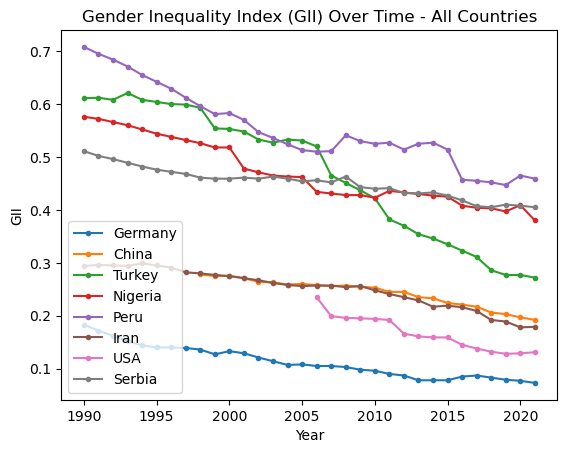

In [57]:
save = False

hdr_list = [hdr_ger, hdr_chn, hdr_tur, hdr_per, hdr_irn, hdr_usa, hdr_srb, hdr_zaf]
countries = ['Germany', 'China', 'Turkey', 'Nigeria', 'Peru', 'Iran', 'USA', 'Serbia', 'South Africa', 'Pakistan']

for i, country_data in enumerate(hdr_list):
    # Extract GII values and years
    gii_values = country_data[0].astype(float)
    years = country_data[1]

    plt.plot(years, gii_values, marker='.', label=countries[i])

plt.xlabel('Year')
plt.ylabel('GII')
plt.title('Gender Inequality Index (GII) Over Time - All Countries')
plt.legend()
if save:
    fig.savefig('..\\plots\\line\\only_gii_comparison_plot.svg')
    fig.savefig('..\\plots\\line\\only_gii_comparison_plot.png')

plt.show()

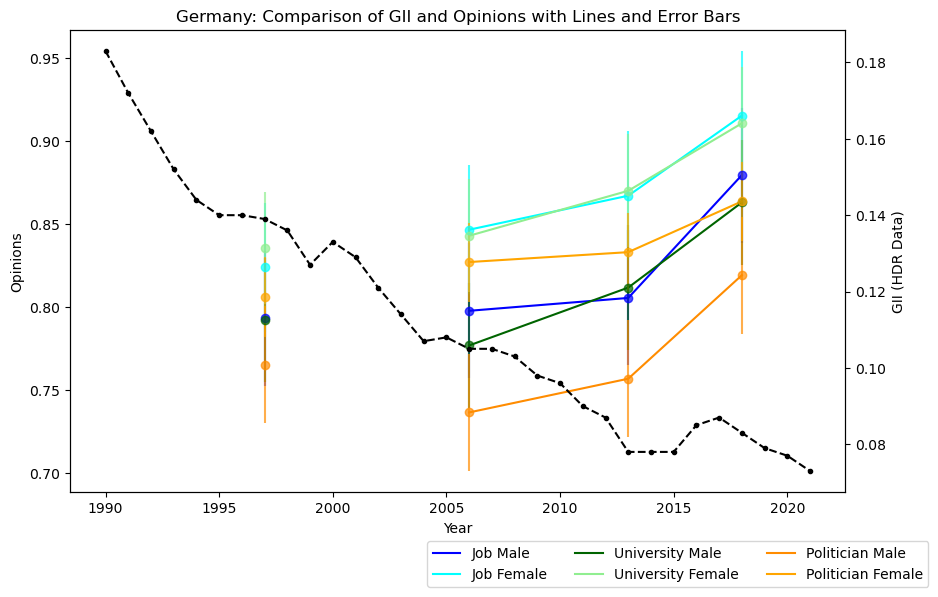

In [58]:
germany_data = {
    'country_table': germany_table,  
    'hdr_data': [hdr_ger]  
}

# Convert GII values to float, handling 'NAN'
gii_values = np.array([float(val) if val != 'NAN' else np.nan for val in hdr_ger[0]])
years_gii = hdr_ger[1]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Color options for Male and Female
male_colors = ['blue', 'darkgreen', 'darkorange']
female_colors = ['cyan', 'lightgreen', 'orange']

# Plot germany_table data for Job, University, and Politician (Male and Female)
for i, question in enumerate(['Job', 'University', 'Politician']):
    male_data = germany_table[germany_table['Sex'] == 'Male'][question]
    female_data = germany_table[germany_table['Sex'] == 'Female'][question]

    # Plot Male and Female lines
    ax1.plot(germany_table[germany_table['Sex'] == 'Male']['Year'], male_data,
             label=f'Male - {question}', linestyle='-', color=male_colors[i])
    ax1.plot(germany_table[germany_table['Sex'] == 'Female']['Year'], female_data,
             label=f'Female - {question}', linestyle='-', color=female_colors[i])

    # Plot Male and Female error bars
    ax1.errorbar(germany_table[germany_table['Sex'] == 'Male']['Year'], male_data,
                 yerr=male_data.std(), fmt='o', color=male_colors[i], alpha=0.7)
    ax1.errorbar(germany_table[germany_table['Sex'] == 'Female']['Year'], female_data,
                 yerr=female_data.std(), fmt='o', color=female_colors[i], alpha=0.7)

# Set labels and title for the left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Opinions')

# Create a second y-axis on the right for GII data
ax2 = ax1.twinx()

# Plot GII values on the right y-axis
ax2.plot(years_gii, gii_values, marker='.', label='GII (HDR Data)', linestyle='--', color='black')

# Set labels for the right y-axis
ax2.set_ylabel('GII (HDR Data)')

# Add legend with updated labels
labels = ['Job Male', 'Job Female', 'University Male', 'University Female', 'Politician Male', 'Politician Female']
fig.legend(loc='upper right', bbox_to_anchor=(0.99, 0.04), ncol=3, labels=labels)

# Show the plot
plt.title('Germany: Comparison of GII and Opinions with Lines and Error Bars')
plt.show()


Make a function

In [59]:
def plot_country_comparison(country_data, country_name, ax=None):
    # Convert GII values to float, handling 'NAN'
    gii_values = np.array([float(val) if val != 'NAN' else np.nan for val in country_data['hdr_data'][0][0]])
    years_gii = country_data['hdr_data'][0][1]

    # Use the provided axis or create a new one if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Color options for Male and Female
    male_colors = ['blue', 'darkgreen', 'darkorange']
    female_colors = ['cyan', 'lightgreen', 'orange']

    # Plot country_table data for Job, University, and Politician (Male and Female)
    for i, question in enumerate(['Job', 'University', 'Politician']):
        male_data = country_data['country_table'][country_data['country_table']['Sex'] == 'Male'][question]
        female_data = country_data['country_table'][country_data['country_table']['Sex'] == 'Female'][question]

        # Plot Male and Female lines
        ax.plot(country_data['country_table'][country_data['country_table']['Sex'] == 'Male']['Year'], male_data,
                label=f'Male - {question}', linestyle='-', color=male_colors[i])
        ax.plot(country_data['country_table'][country_data['country_table']['Sex'] == 'Female']['Year'], female_data,
                label=f'Female - {question}', linestyle='-', color=female_colors[i])

        # Plot Male and Female error bars
        ax.errorbar(country_data['country_table'][country_data['country_table']['Sex'] == 'Male']['Year'], male_data,
                    yerr=male_data.std(), fmt='o', color=male_colors[i], alpha=0.7)
        ax.errorbar(country_data['country_table'][country_data['country_table']['Sex'] == 'Female']['Year'], female_data,
                    yerr=female_data.std(), fmt='o', color=female_colors[i], alpha=0.7)

    ax.set_xlabel('Year')
    ax.set_ylabel('Opinions')
    ax.set_title(country_name)

    ax2 = ax.twinx()
    ax2.invert_yaxis()
    # Plot GII values on the right y-axis
    ax2.plot(years_gii, gii_values, marker='.', label='GII (HDR Data)', linestyle='--', color='black')

    ax2.set_ylabel('GII (HDR Data)')

    if ax is None:
        labels = ['Job Male', 'Job Female', 'University Male', 'University Female', 'Politician Male', 'Politician Female']
        ax.legend(loc='upper right', bbox_to_anchor=(0.99, 0.04), ncol=3, labels=labels)

        ax.set_title(f'{country_name}: Comparison of GII and Opinions with Lines and Error Bars')

    return ax

Make a grid again

In [71]:
germany_data = {
    'country_table': germany_table,  
    'hdr_data': [hdr_ger]  
}
china_data = {
    'country_table': china_table,
    'hdr_data': [hdr_chn]
}
nigeria_data = {
    'country_table': nigeria_table,
    'hdr_data': [hdr_nga]
}
turkey_data = {
    'country_table': turkey_table,
    'hdr_data': [hdr_tur]
}
usa_data = {
    'country_table': usa_table,
    'hdr_data': [hdr_usa]
}
iran_data = {
    'country_table': iran_table,
    'hdr_data': [hdr_irn]
}
serbia_data =  {
    'country_table': serbia_table,
    'hdr_data': [hdr_srb]
}
southafrica_data =  {
    'hdr_data': [hdr_zaf]
    }
pakistan_data =  {
    'hdr_data': [hdr_pak]
}

Create a 3x2 grid of subplots for the combo of everything above

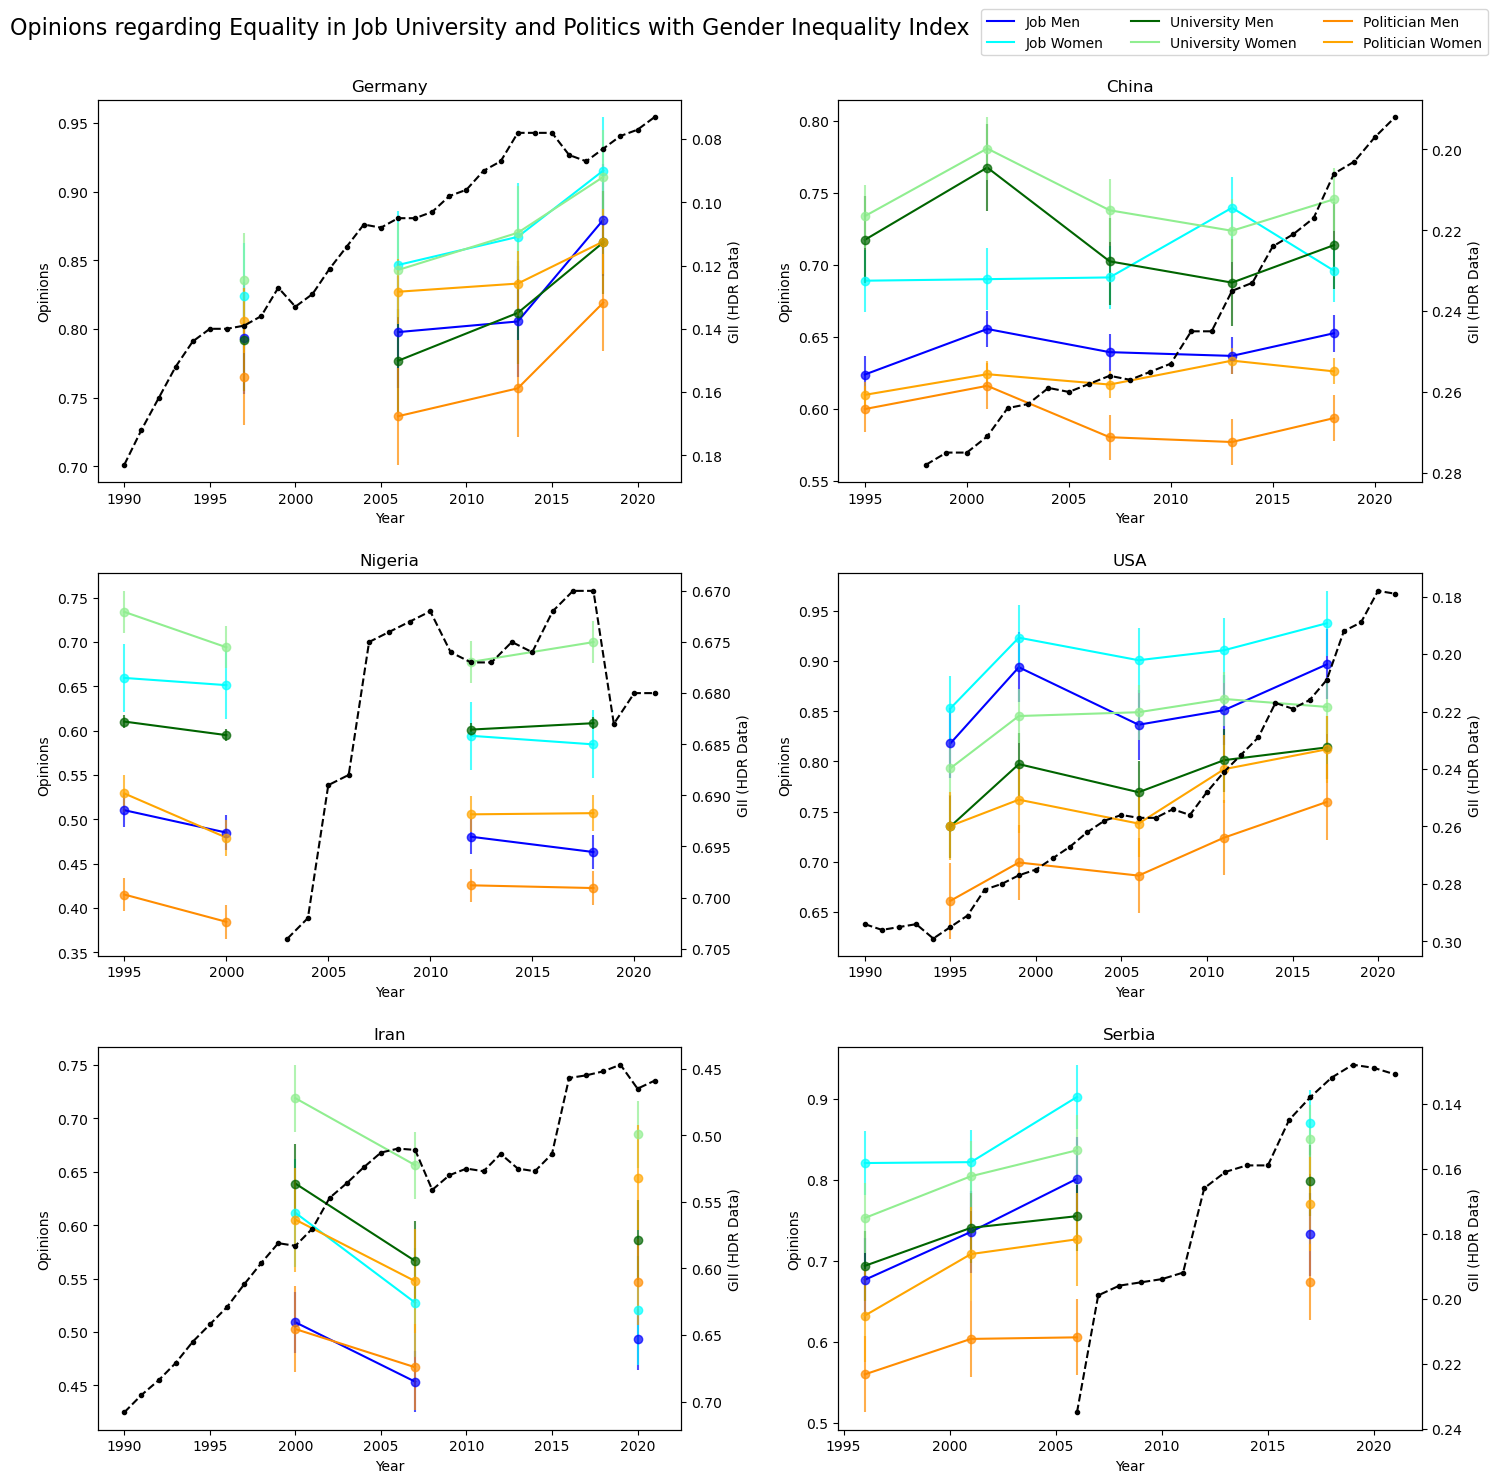

In [74]:
save=True

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Plot each country on its corresponding subplot
countries = ['Germany', 'China', 'Nigeria', 'USA', 'Iran', 'Serbia']
for i, country in enumerate(countries):
    ax = axes[i]
    ax = plot_country_comparison(globals()[f"{country.lower()}_data"], country, ax)

# Add common legend and title
labels = ['Job Men', 'Job Women', 
          'University Men', 'University Women', 
          'Politician Men', 'Politician Women']
fig.suptitle('Opinions regarding Equality in Job University and Politics with Gender Inequality Index' , fontsize=16, x=0.32, y=0.99)
fig.legend(loc='upper right', bbox_to_anchor=(0.99, 0.999), ncol=3, labels=labels)

plt.tight_layout(pad=2)

if save:
    fig.savefig('..\\plots\\line\\comparison_plot_inverted_gii.svg')
    fig.savefig('..\\plots\\line\\comparison_plot_inverted_gii.pdf')

plt.show()


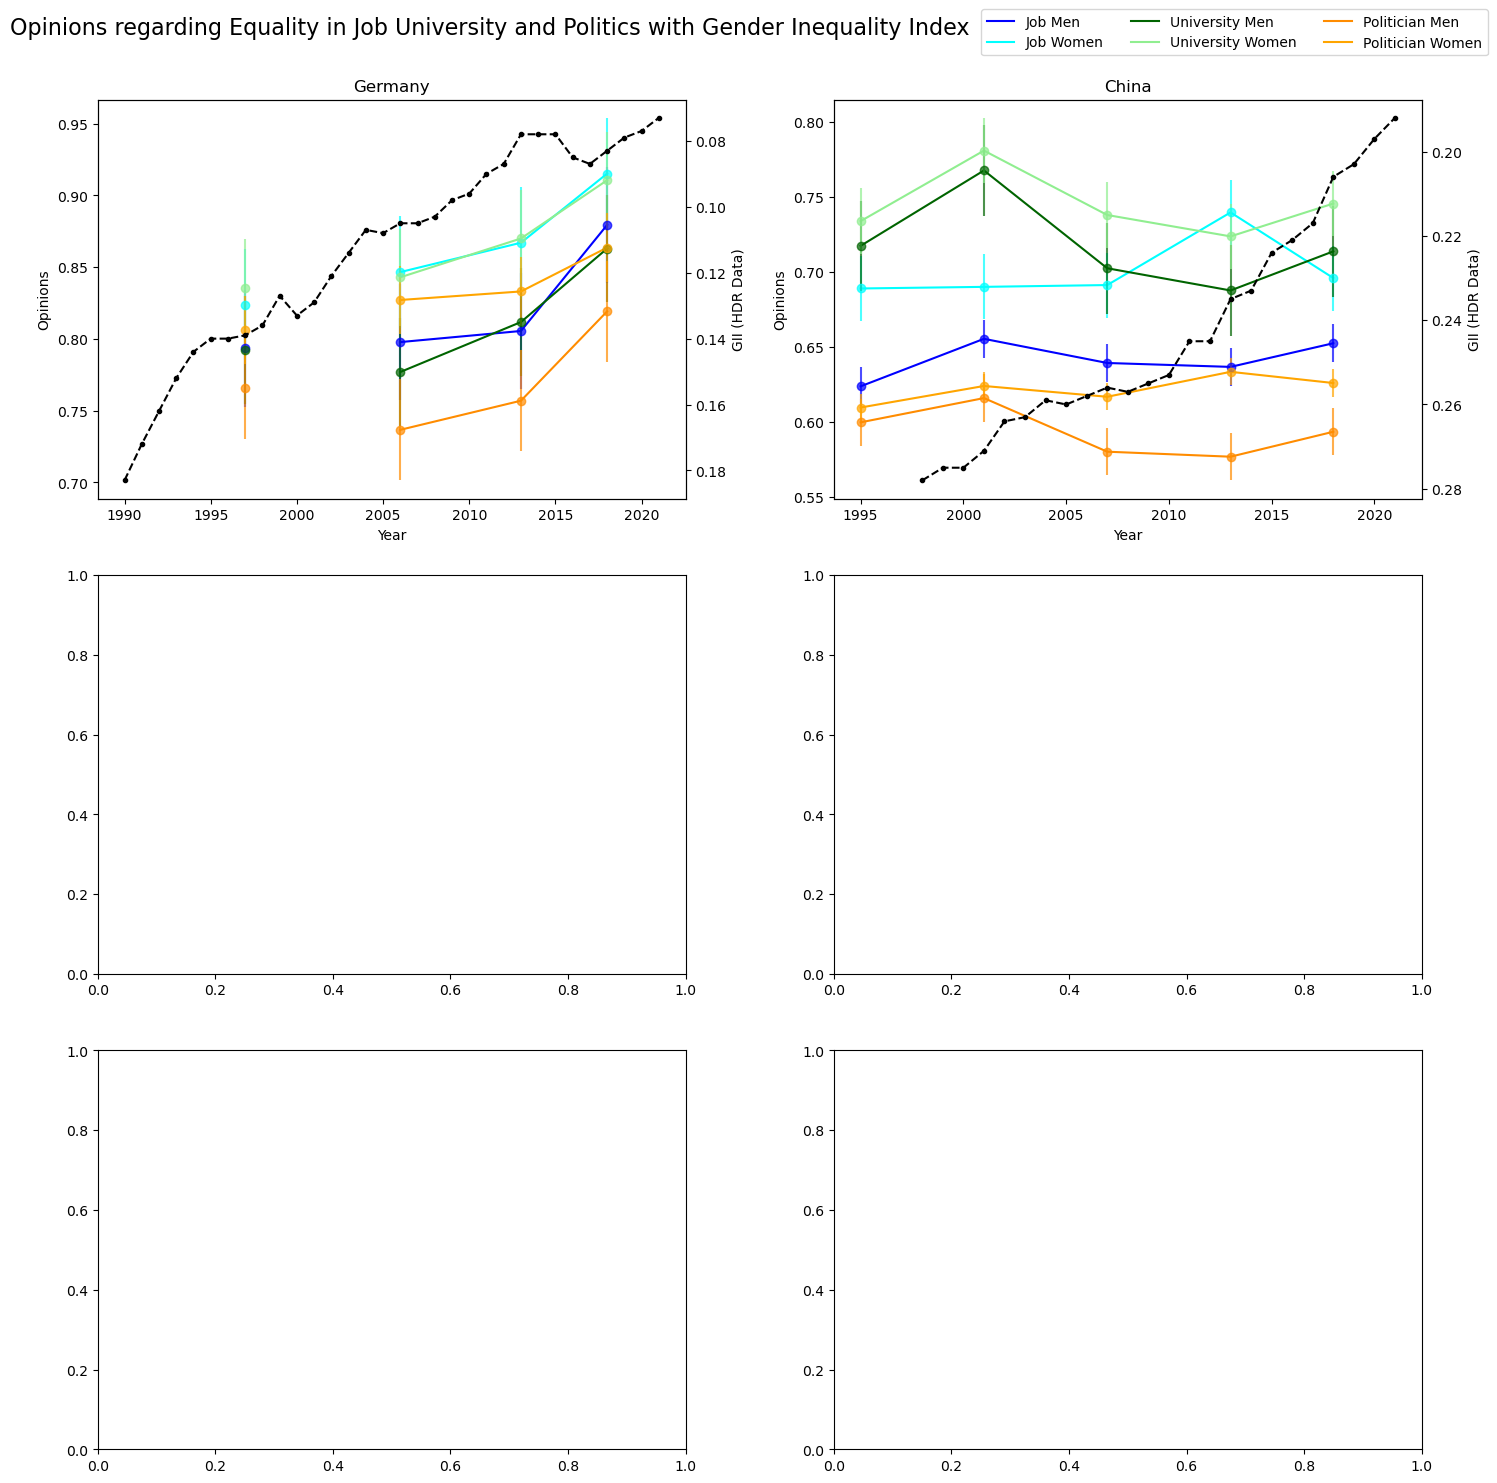

In [73]:
save=True

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Plot each country on its corresponding subplot
countries = ['Germany', 'China']
for i, country in enumerate(countries):
    ax = axes[i]
    ax = plot_country_comparison(globals()[f"{country.lower()}_data"], country, ax)

# Add common legend and title
labels = ['Job Men', 'Job Women', 
          'University Men', 'University Women', 
          'Politician Men', 'Politician Women']
fig.suptitle('Opinions regarding Equality in Job University and Politics with Gender Inequality Index' , fontsize=16, x=0.32, y=0.99)
fig.legend(loc='upper right', bbox_to_anchor=(0.99, 0.999), ncol=3, labels=labels)

plt.tight_layout(pad=2)

if save:
    fig.savefig('..\\plots\\line\\comparison_plot_inverted_gii.svg')
    fig.savefig('..\\plots\\line\\comparison_plot_inverted_gii.pdf')

plt.show()


GII split into job, uni and politics

In [35]:
#print(HDR)
"lfpr_f - Labour force participation rate, female (% ages 15 and older)"
"pr_f - Share of seats in parliament, female (% held by women)"
"se_f - Population with at least some secondary education, female (% ages 25 and older)"

hdr_2_ger = [HDR[HDR["code"]=="DEU"]['year'].values, HDR[HDR["code"]=="DEU"]['lfpr_f'].values, HDR[HDR["code"]=="DEU"]['pr_f'].values, HDR[HDR["code"]=="DEU"]['se_f'].values, HDR[HDR["code"]=="DEU"]['gii'].values]
hdr_2_chn = [HDR[HDR["code"]=="CHN"]['year'].values, HDR[HDR["code"]=="CHN"]['lfpr_f'].values, HDR[HDR["code"]=="CHN"]['pr_f'].values, HDR[HDR["code"]=="CHN"]['se_f'].values, HDR[HDR["code"]=="CHN"]['gii'].values]
hdr_2_tur = [HDR[HDR["code"]=="TUR"]['year'].values, HDR[HDR["code"]=="TUR"]['lfpr_f'].values, HDR[HDR["code"]=="TUR"]['pr_f'].values, HDR[HDR["code"]=="TUR"]['se_f'].values, HDR[HDR["code"]=="TUR"]['gii'].values]
hdr_2_nga = [HDR[HDR["code"]=="NGA"]['year'].values, HDR[HDR["code"]=="NGA"]['lfpr_f'].values, HDR[HDR["code"]=="NGA"]['pr_f'].values, HDR[HDR["code"]=="NGA"]['se_f'].values, HDR[HDR["code"]=="NGA"]['gii'].values]
hdr_2_irn = [HDR[HDR["code"]=="IRN"]['year'].values, HDR[HDR["code"]=="IRN"]['lfpr_f'].values, HDR[HDR["code"]=="IRN"]['pr_f'].values, HDR[HDR["code"]=="IRN"]['se_f'].values, HDR[HDR["code"]=="IRN"]['gii'].values]
hdr_2_srb = [HDR[HDR["code"]=="SRB"]['year'].values, HDR[HDR["code"]=="SRB"]['lfpr_f'].values, HDR[HDR["code"]=="SRB"]['pr_f'].values, HDR[HDR["code"]=="SRB"]['se_f'].values, HDR[HDR["code"]=="SRB"]['gii'].values]
print(hdr_2_chn)

[array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64), array([73.022, 72.778, 72.532, 72.285, 72.037, 71.788, 71.538, 71.286,
       71.033, 70.778, 70.522, 69.868, 69.206, 68.536, 67.857, 67.17 ,
       66.476, 65.774, 65.065, 64.349, 63.626, 63.816, 63.681, 63.567,
       63.568, 63.565, 63.468, 63.292, 63.114, 63.014, 61.818, 61.612]), array(['NAN', 'NAN', 'NAN', 'NAN', 'NAN', 'NAN', 'NAN', 'NAN',
       '21.81940248', '21.81940248', '21.78284182', '21.78284182',
       '21.78284182', '20.23450586', '20.23450586', '20.26845638',
       '20.26845638', '20.62099224', '21.32574489', '21.32574489',
       '21.32574489', '21.32303559', '21.32303559', '23.40140609',
       '23.40140609', '23.62284556', '23.62284556', '24.24760602',
       '24.89932886', '24.94117647', '24.94117647', '24.94117647'],
      dtype=o

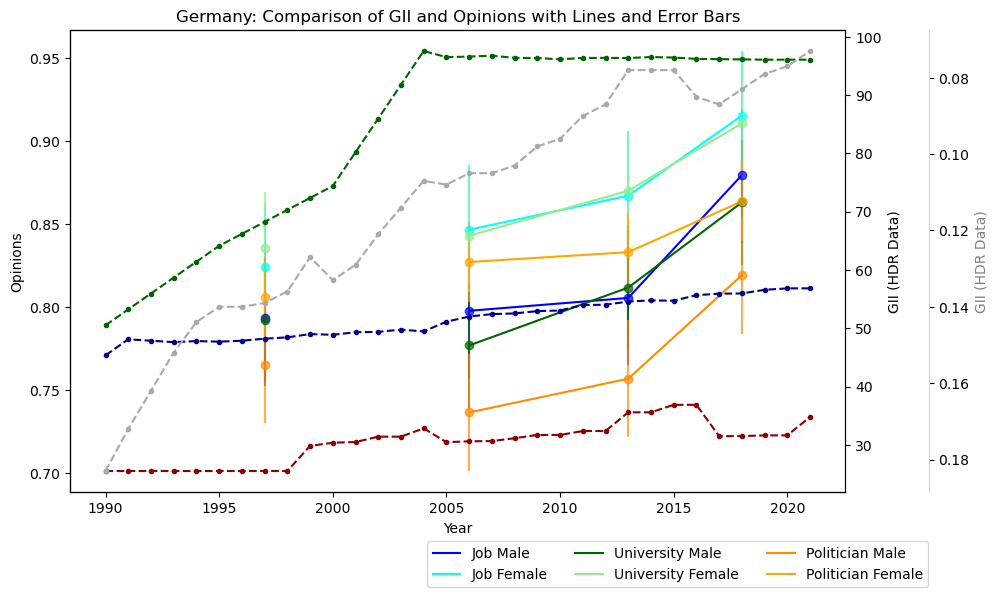

In [47]:
germany_data = {
    'country_table': germany_table,  
    'hdr_data': [hdr_2_ger]  
}

# Convert GII values to float, handling 'NAN'
gii_lfpr_f = np.array([float(val) if val != 'NAN' else np.nan for val in hdr_2_ger[1]])
gii_pr_f = np.array([float(val) if val != 'NAN' else np.nan for val in hdr_2_ger[2]])
gii_se_f = np.array([float(val) if val != 'NAN' else np.nan for val in hdr_2_ger[3]])
gii_values = np.array([float(val) if val != 'NAN' else np.nan for val in hdr_2_ger[4]])
years_gii = hdr_2_ger[0]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Color options for Male and Female
male_colors = ['blue', 'darkgreen', 'darkorange']
female_colors = ['cyan', 'lightgreen', 'orange']

# Plot germany_table data for Job, University, and Politician (Male and Female)
for i, question in enumerate(['Job', 'University', 'Politician']):
    male_data = germany_table[germany_table['Sex'] == 'Male'][question]
    female_data = germany_table[germany_table['Sex'] == 'Female'][question]

    # Plot Male and Female lines
    ax1.plot(germany_table[germany_table['Sex'] == 'Male']['Year'], male_data,
             label=f'Male - {question}', linestyle='-', color=male_colors[i])
    ax1.plot(germany_table[germany_table['Sex'] == 'Female']['Year'], female_data,
             label=f'Female - {question}', linestyle='-', color=female_colors[i])

    # Plot Male and Female error bars
    ax1.errorbar(germany_table[germany_table['Sex'] == 'Male']['Year'], male_data,
                 yerr=male_data.std(), fmt='o', color=male_colors[i], alpha=0.7)
    ax1.errorbar(germany_table[germany_table['Sex'] == 'Female']['Year'], female_data,
                 yerr=female_data.std(), fmt='o', color=female_colors[i], alpha=0.7)

# Set labels and title for the left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Opinions')

# Create a second y-axis on the right for GII data
ax2 = ax1.twinx()

# Plot GII values on the right y-axis
ax2.plot(years_gii, gii_lfpr_f, marker='.', label='GII LFPR (HDR Data)', linestyle='--', color='darkblue')#job
ax2.plot(years_gii, gii_pr_f, marker='.', label='GII PR (HDR Data)', linestyle='--', color='darkred') #politics
ax2.plot(years_gii, gii_se_f, marker='.', label='GII SE (HDR Data)', linestyle='--', color='darkgreen')#uni

# Set labels for the right y-axis
ax2.set_ylabel('GII (HDR Data)')

# GII values
ax3 = ax1.twinx()
ax3.invert_yaxis()

ax3.spines['right'].set_position(('outward', 60))
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.spines['right'].set_color('lightgray')
ax3.set_ylabel('GII (HDR Data)', color='gray')
ax3.plot(years_gii, gii_values, marker='.', label='GII SE (HDR Data)', linestyle='--', color='darkgray')#all

# Add legend with updated labels
labels = ['Job Male', 'Job Female', 'University Male', 'University Female', 'Politician Male', 'Politician Female']
fig.legend(loc='upper right', bbox_to_anchor=(0.99, 0.04), ncol=3, labels=labels)

# Show the plot
plt.title('Germany: Comparison of GII and Opinions with Lines and Error Bars')
plt.show()